In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

In [4]:
# set the data path
dataPath = '../input/'

In [5]:
# read the data and split into train and test set
df = pd.read_csv(dataPath + 'year_prediction.csv')
df_train = df[:463715]
df_test = df[463715:]
df_train.head(5)

,label,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


Let's first look at the <b>distribution of the labels</b>...

In [6]:
print("Year label ranges from %s to %s." %(min(df_train['label']), max(df_train['label'])))

Year label ranges from 1922 to 2011.


<IPython.core.display.Javascript object>


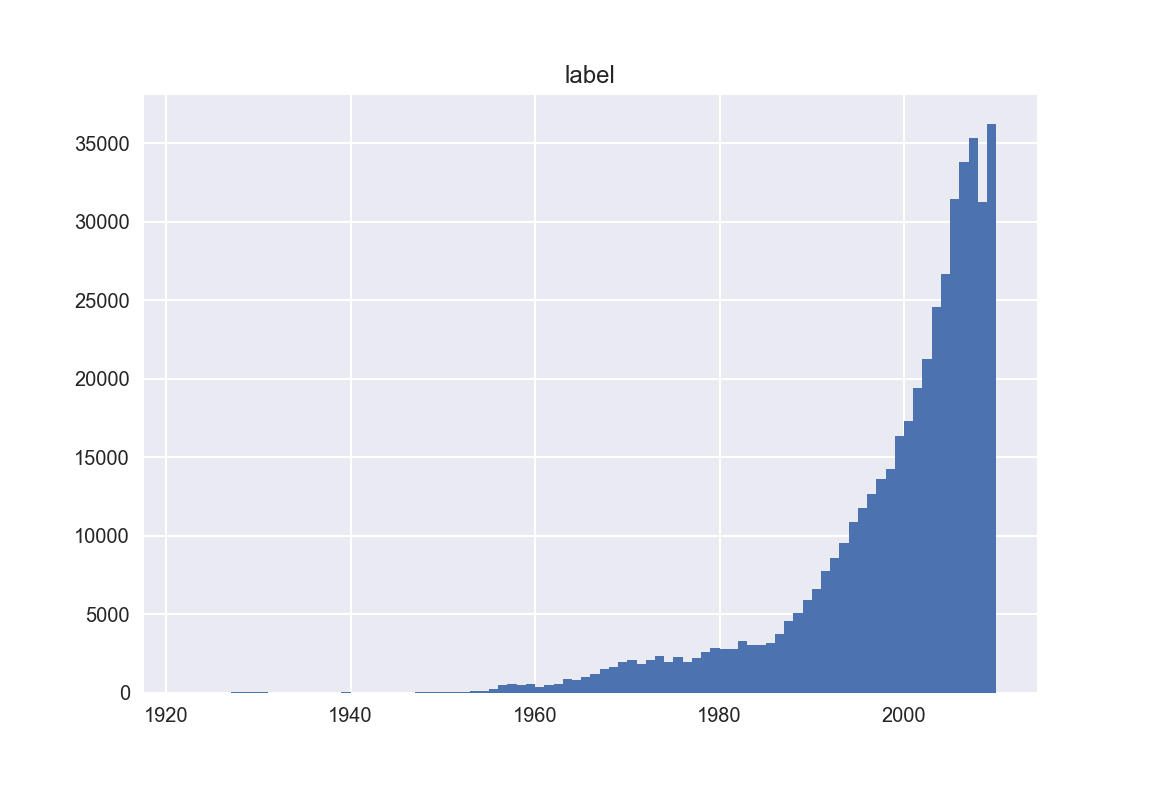

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110979400>]], dtype=object)

In [7]:
df_train.hist(column="label", bins = range(1922,2011))

As expected, we have a lot more recent than old material. Let's investigate the features.

<b>Timbre average</b>

Let's first look at some extremes. Old recordings should have a poorer frequency range. Also, modern mastering tries to make as much "use" of the spectrum as possible. The extremes of the average timbre values should take on lower values...

In [17]:
# create a decade column
df_train['decade'] = df_train['label'].map(lambda x: int(np.floor(x / 10) * 10)) 

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<IPython.core.display.Javascript object>


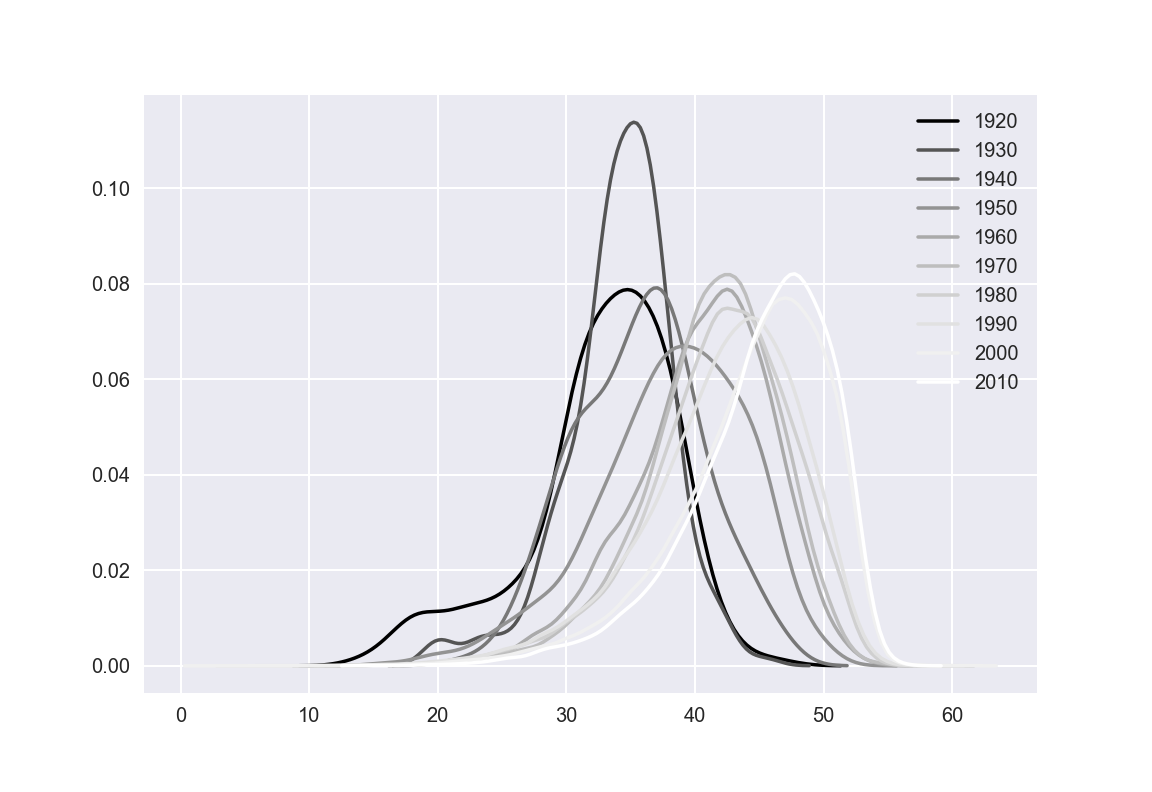

In [35]:
plt.figure()
for group, frame in df_train.groupby('decade'):
    sns.kdeplot(frame['TimbreAvg1'], label=group, color=[np.sqrt((group-1920) / (2010-1920)), np.sqrt((group-1920) / (2010-1920)), np.sqrt((group-1920) / (2010-1920))])

This plot shows the distribution of the lowest frequency range for different decades. We can see very well how the amount of bass increases over time... There is even a huge jump from the 1990s to the 00s...

Let's look at a value in the center of the frequency range..

<IPython.core.display.Javascript object>


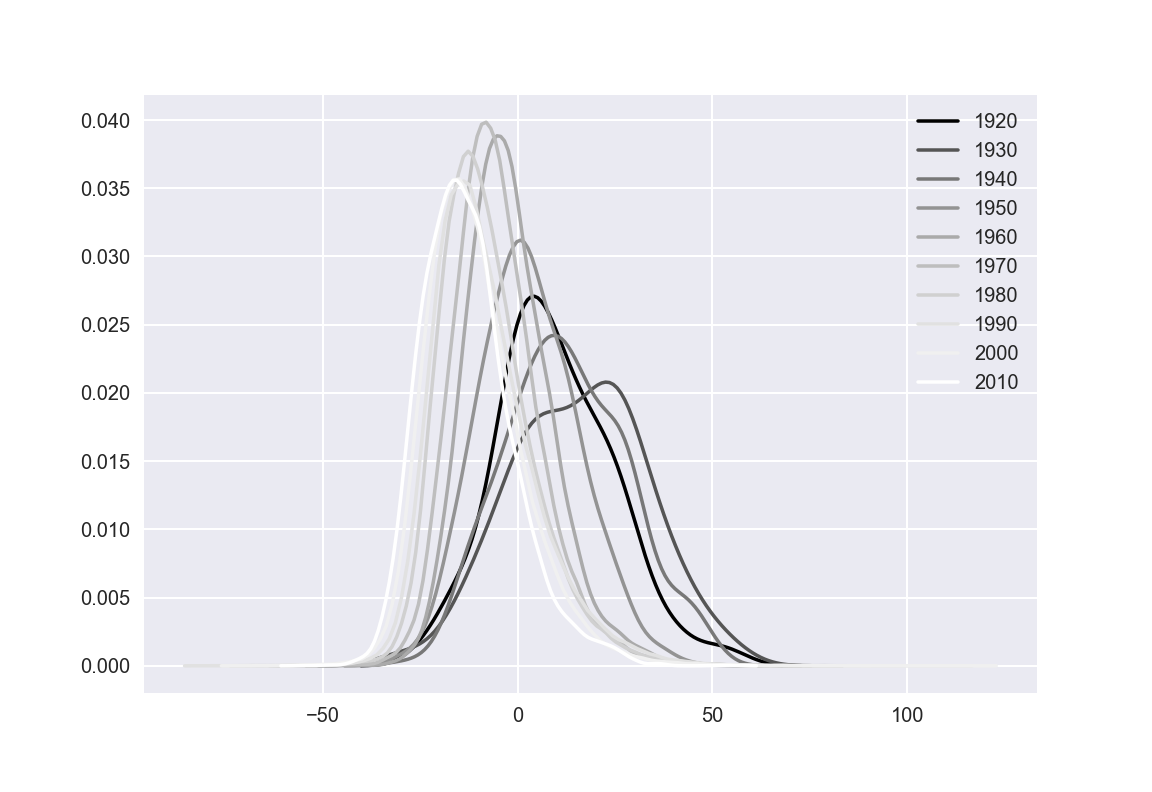

In [81]:
plt.figure()
for group, frame in df_train.groupby('decade'):
    sns.kdeplot(frame['TimbreAvg6'], label=group, color=[np.sqrt((group-1920) / (2010-1920)), np.sqrt((group-1920) / (2010-1920)), np.sqrt((group-1920) / (2010-1920))])

Yes, the opposite happens! I guess, these values are refering to the percentage of energy concentrated in the distinct frequency bands. If there is no bass (in old recordings), a higher relative amount of energy will be located in the middle...

But: Look at no. 7! I would really like to know what the frequency ranges are...

<IPython.core.display.Javascript object>


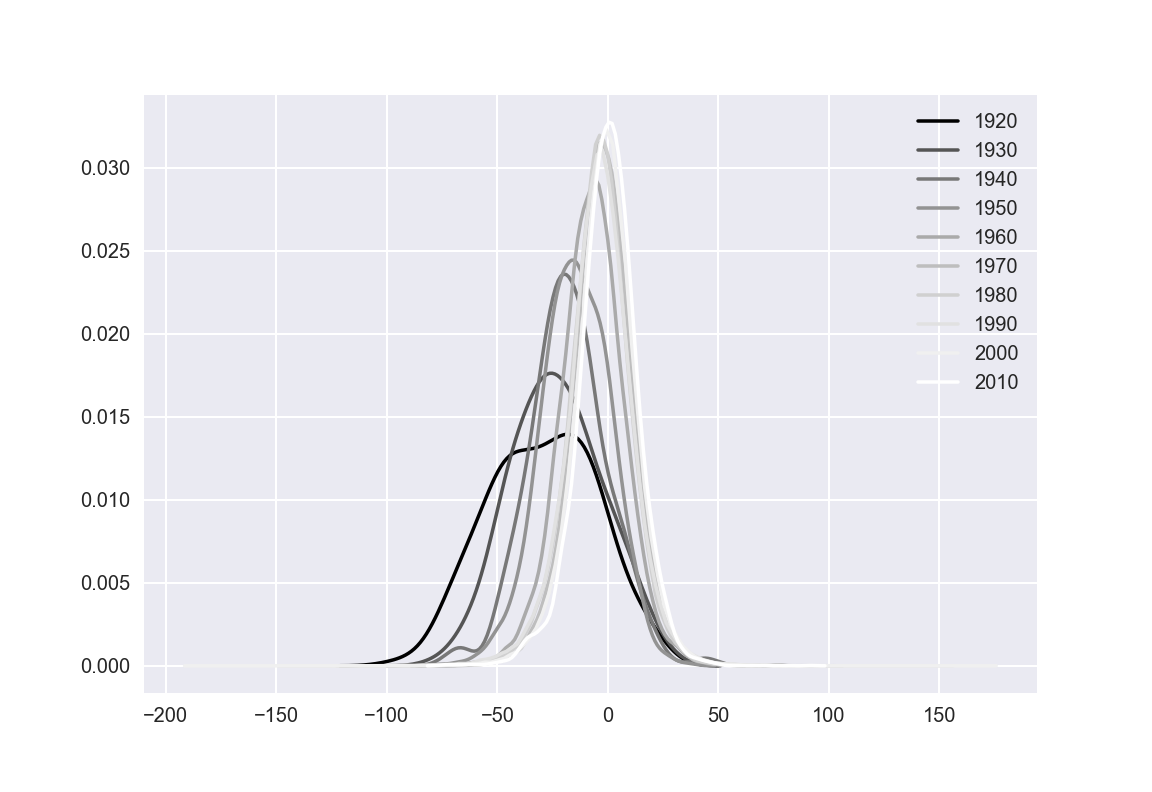

In [83]:
plt.figure()
for group, frame in df_train.groupby('decade'):
    sns.kdeplot(frame['TimbreAvg7'], label=group, color=[np.sqrt((group-1920) / (2010-1920)), np.sqrt((group-1920) / (2010-1920)), np.sqrt((group-1920) / (2010-1920))])

Finally, the highest range...

<IPython.core.display.Javascript object>


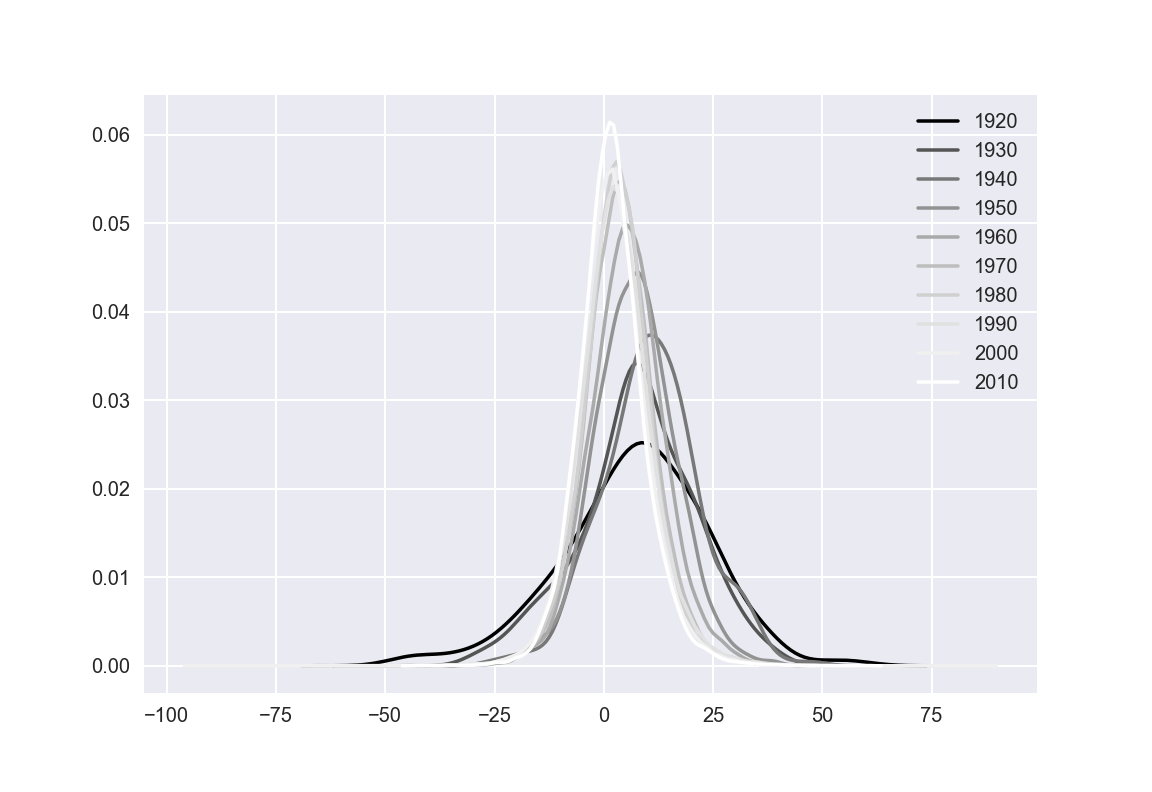

In [39]:
plt.figure()
for group, frame in df_train.groupby('decade'):
    sns.kdeplot(frame['TimbreAvg12'], label=group, color=[np.sqrt((group-1920) / (2010-1920)), np.sqrt((group-1920) / (2010-1920)), np.sqrt((group-1920) / (2010-1920))])
    

This is interesting... The values in old recordings seem to be more spread and slightly higher. I don't know which bands are used here exactly, but we probably have to consider factors like noise in the recordings here. Modern recordings have a nicer definition in the heights, but are also less noise and noise is broadband. This is just a thought - I don't have a reasonable explanation for this - but it is indeed interesting!

<b> Timbre co-variance </b>

As commented by another user, these features should describe how one of the timbre average values varies (over time) with respect to another. 12 x 12 features yields a 144 element co-variance matrix. We only need the upper (or lower) triangle, which results in the 78 values we are given. 

A high positive covariance between two frequency bands (a and b) means that if the energy increases in band a, it will also increase in band b, and if it decreases in a, it will decrease in b. It is kind of an inverse measure of the independence of the bands.

A guess would be, that these values should be generally lower for modern recordings. Audio engineers try to assign distinct ranges to different instruments (very roughly speaking) to create transparancy. This should yield a lower co-variance. Let's take a look at a random example:

<IPython.core.display.Javascript object>


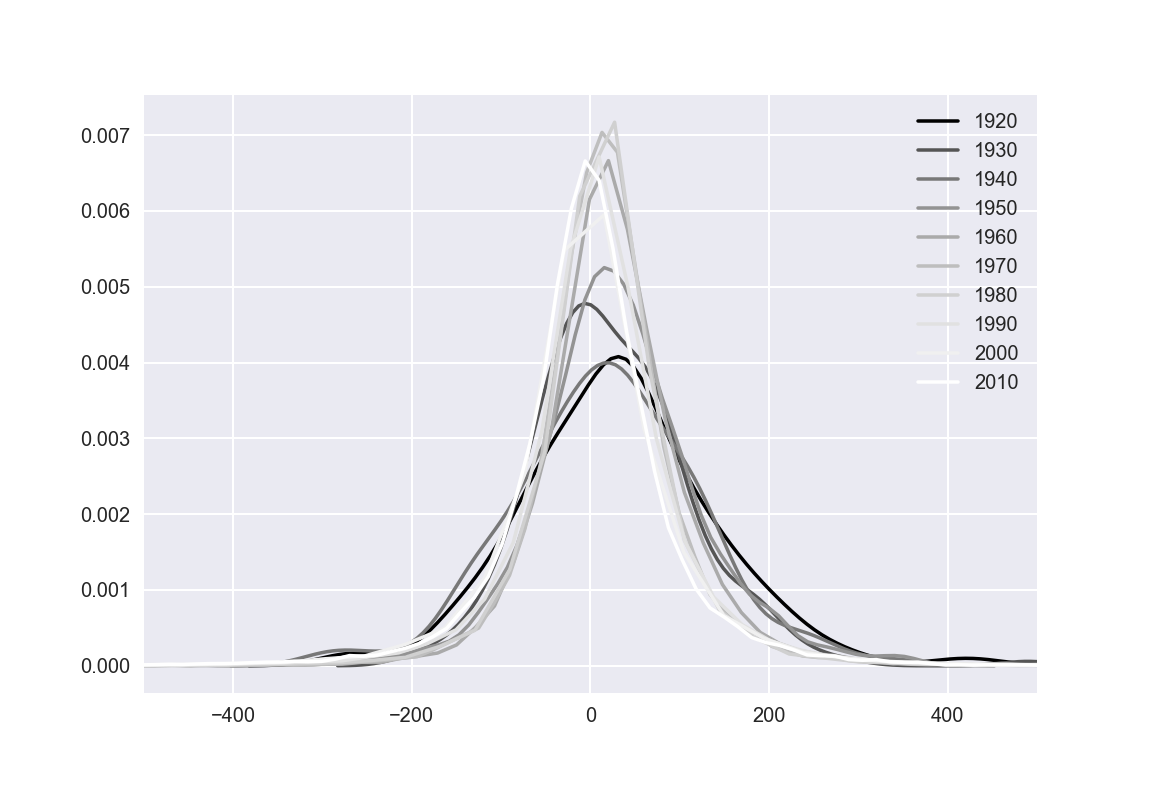

(-500, 500)

In [50]:
plt.figure()
for group, frame in df_train.groupby('decade'):
    lm = sns.kdeplot(frame['TimbreCovariance19'], label=group, color=[np.sqrt((group-1920) / (2010-1920)), np.sqrt((group-1920) / (2010-1920)), np.sqrt((group-1920) / (2010-1920))])
axes = lm.axes
axes.set_xlim(-500,500)

There seems to be indeed a slight tendency (feel free to try different feature examples). But in general it again seems that the values are more spread for old than new recordings. We have seen this now a few times (except for the lowest frequency band). Does this mean modern recordings sound more uniform?

<b>Feature correlation</b> (the classic stuff...)

In [91]:
avg_feats = ['TimbreAvg' + str(x) for x in range(1,13)]
avg_feats.append('label')
corr_feats = df_train[avg_feats]
corr = corr_feats.corr()

<IPython.core.display.Javascript object>


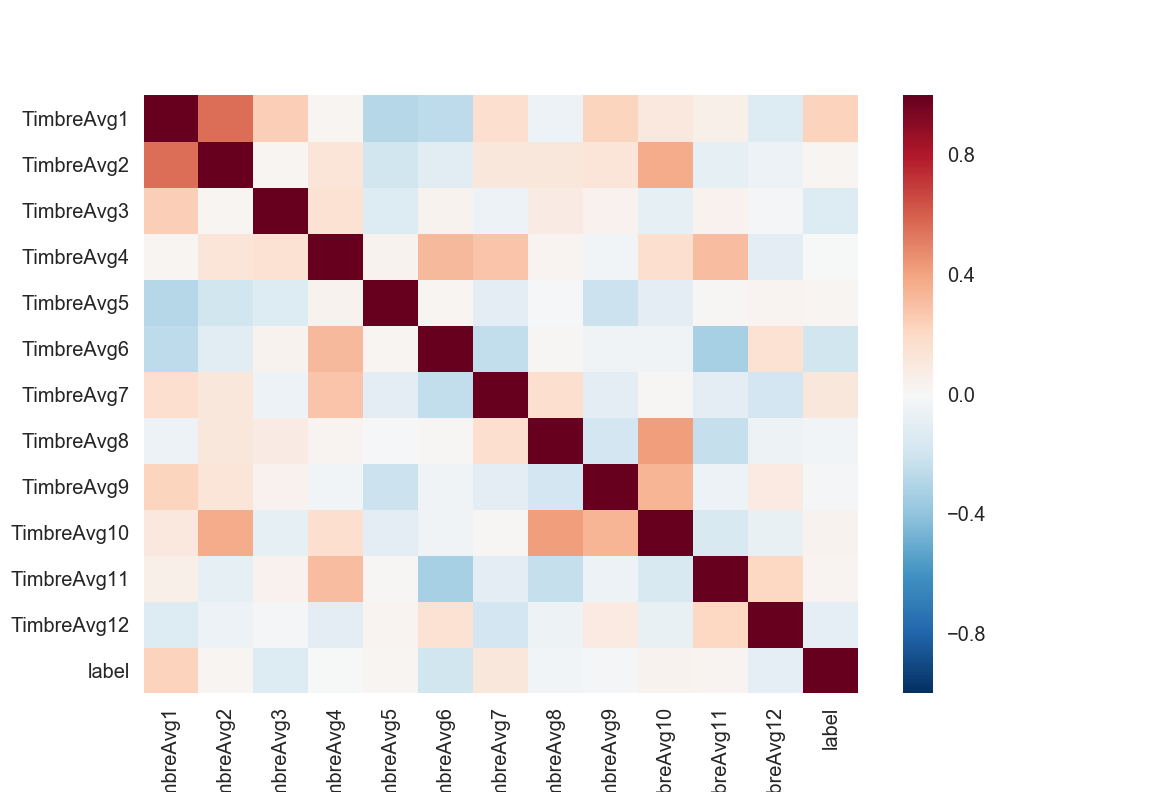

In [92]:
plt.figure()
sns.heatmap(corr)
plt.yticks(rotation=0);
plt.xticks(rotation=90);

The lowest frequency bin and really gives a nice correlation with the production year!

<IPython.core.display.Javascript object>


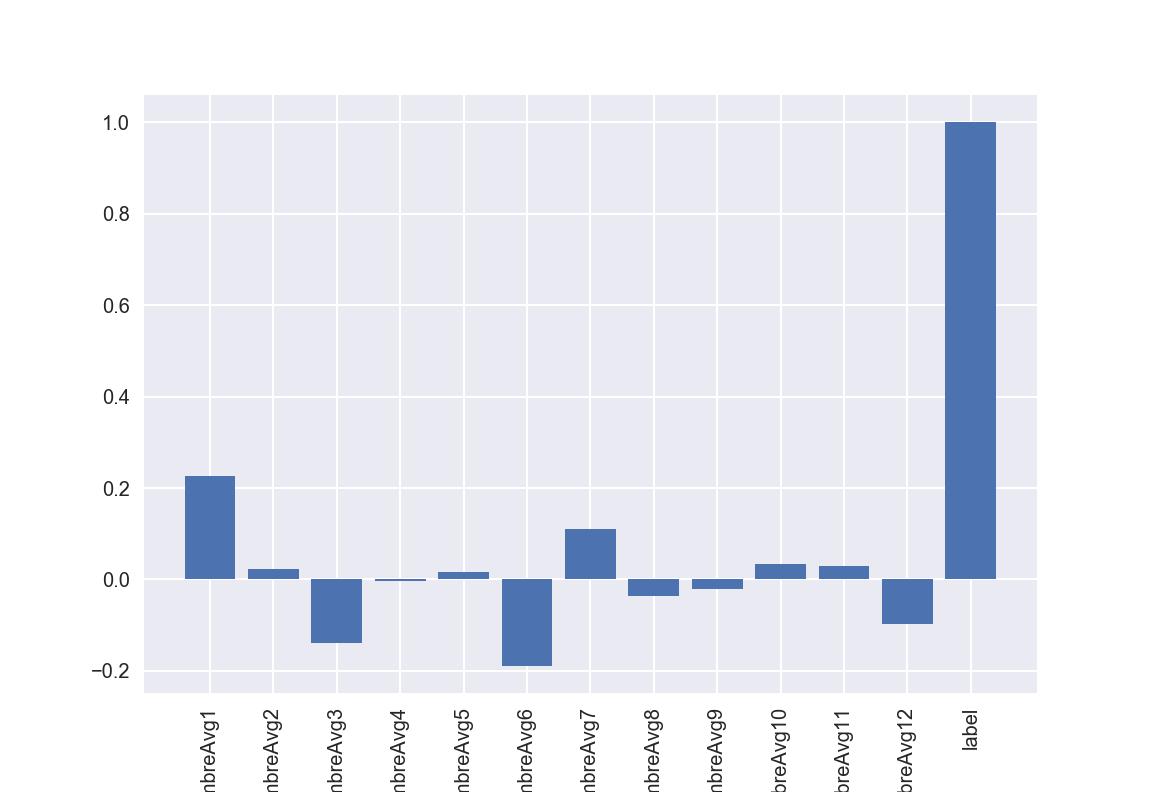

In [93]:
plt.figure()
plt.bar(range(0,len(avg_feats)),corr['label'])
plt.xticks(range(0,len(avg_feats)), avg_feats, rotation='vertical');

In [88]:
avg_feats = ['TimbreCovariance' + str(x) for x in range(1,78)]
avg_feats.append('label')
corr_feats = df_train[avg_feats]
corr = corr_feats.corr()

<IPython.core.display.Javascript object>


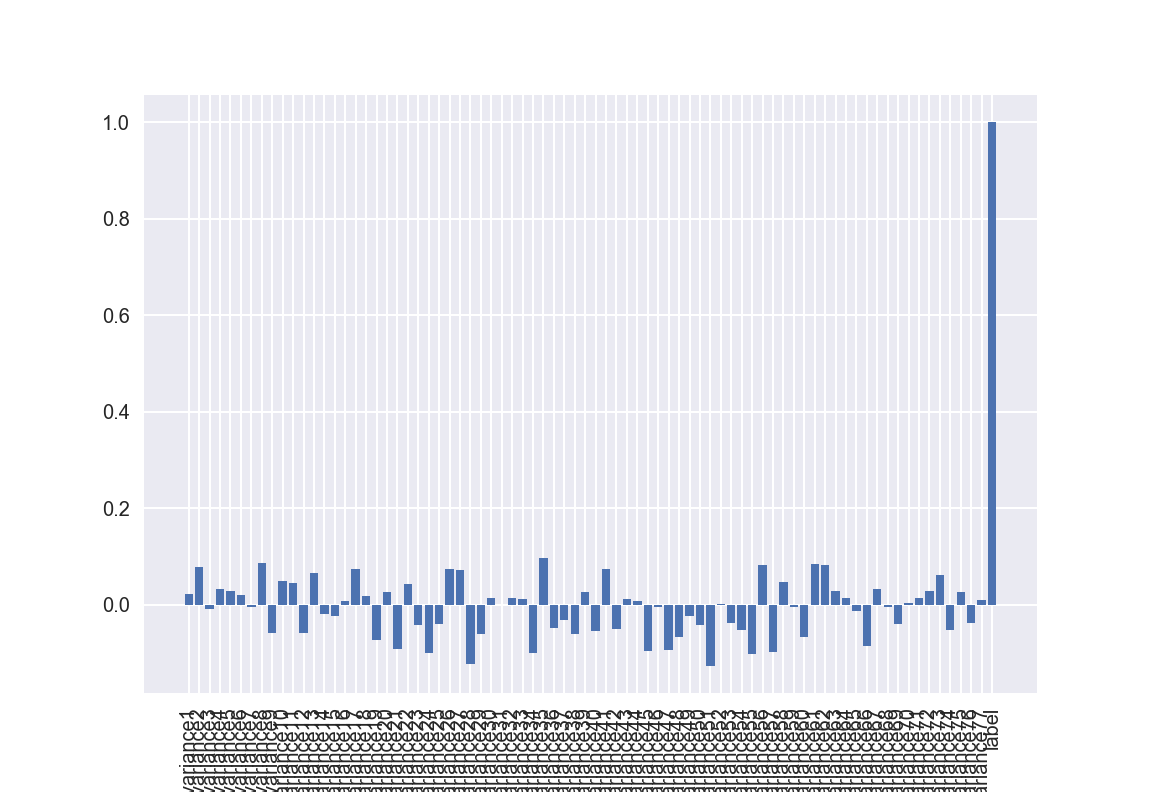

In [89]:
plt.figure()
plt.bar(range(0,len(avg_feats)),corr['label'])
plt.xticks(range(0,len(avg_feats)), avg_feats, rotation='vertical');

<b> Possible classification and regression problems... </b>
* classify the decade
* classify a recording as "old" or "new" (with different thresholds)
* predict production year in a regression problem